In [217]:
# working on the spotify dataset 
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns 
import matplotlib.pyplot as plt 
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("/Users/apple/Downloads/genres_v2.csv")

/var/folders/pg/v7p1l11s1v9fryxc7r0sc_zh0000gn/T/ipykernel_16301/4047471565.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/apple/Downloads/genres_v2.csv")


In [8]:
df # main dataset 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [5]:
# creating the copy of the dataset 
df1 = df

In [7]:
# getting the information about the data 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [9]:
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [112]:
df1.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.394,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.383,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.124,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.488,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle
42304,0.529,0.945,9,-5.862,1,0.0615,0.001890,0.000055,0.4140,0.134,...,6MAAMZImxcvYhRnxDLTufD,spotify:track:6MAAMZImxcvYhRnxDLTufD,https://api.spotify.com/v1/tracks/6MAAMZImxcvY...,https://api.spotify.com/v1/audio-analysis/6MAA...,162161,4,hardstyle,NaN,20999.0,Best of Hardstyle 2020


In [9]:
# removing the unneccesary columns 
df1.drop(['id','uri','track_href','analysis_url','Unnamed: 0'], axis = 1 , inplace = True )

In [11]:
df1['type'].value_counts() # all the columns contain the same value dropping this as well 
df1.drop('type', axis = 1 , inplace = True)

In [13]:
df1.shape

(42305, 16)

In [15]:
# checking for the title column 
df1['title'].isnull().sum()
# more thaan half are non and the song and the genre is provided so dropping that as well
df1.drop('title', axis =1 , inplace = True )

In [17]:
df1['duration_ms'] = df1['duration_ms']/(1000*60)


In [19]:
df1['song_name'].isnull().sum()
values = {"song_name":"Unknown_song"}
df1.fillna(value = values)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,2.075650,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,3.740450,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,1.647017,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,2.061017,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,2.054967,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,4.486800,4,hardstyle,Unknown_song
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,3.501867,4,hardstyle,Unknown_song
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,3.913717,4,hardstyle,Unknown_song
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,5.386667,4,hardstyle,Unknown_song


In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt 

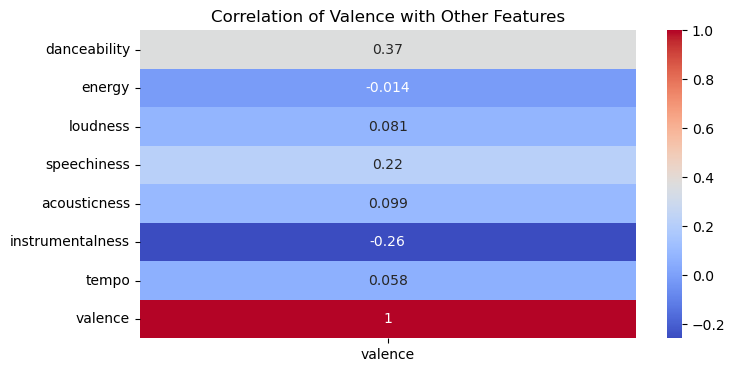

In [25]:
columns = ["danceability", "energy", "loudness", "speechiness", 
           "acousticness", "instrumentalness", "tempo", "valence"]

# Select the relevant columns
selected_df = df1[columns]

# Create the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap for correlation of valence with other features
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix[["valence"]], annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation of Valence with Other Features")
plt.show()


In [ ]:
# we can see the strong neagtive correlation between the intrumental and the valence 
# moderate correlation between dancebility and the valence

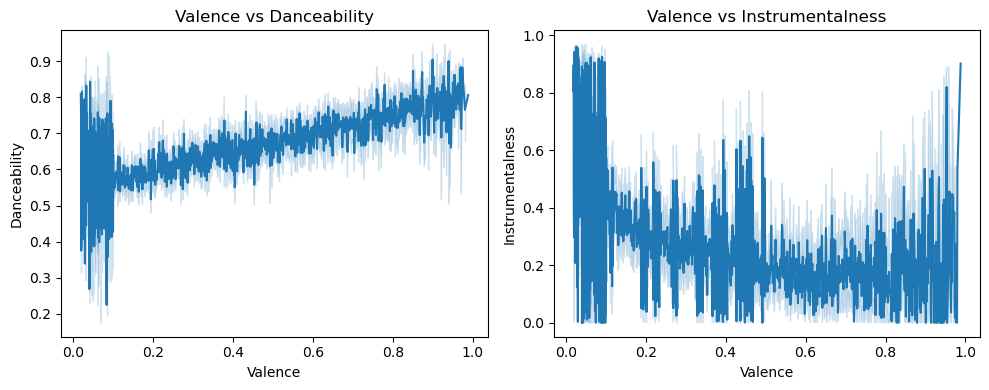

In [27]:
# plot a graph with the dancebilty and the valence 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

# Plot for valence vs danceability
plt.subplot(1, 2, 1)
plt.title("Valence vs Danceability")
sns.lineplot(x=df1["valence"], y=df1["danceability"])
plt.xlabel("Valence")
plt.ylabel("Danceability")

# Plot for valence vs instrumentalness
plt.subplot(1, 2, 2)
plt.title("Valence vs Instrumentalness")
sns.lineplot(x=df1["valence"], y=df1["instrumentalness"])
plt.xlabel("Valence")
plt.ylabel("Instrumentalness")

plt.tight_layout()  # To adjust spacing
plt.show()


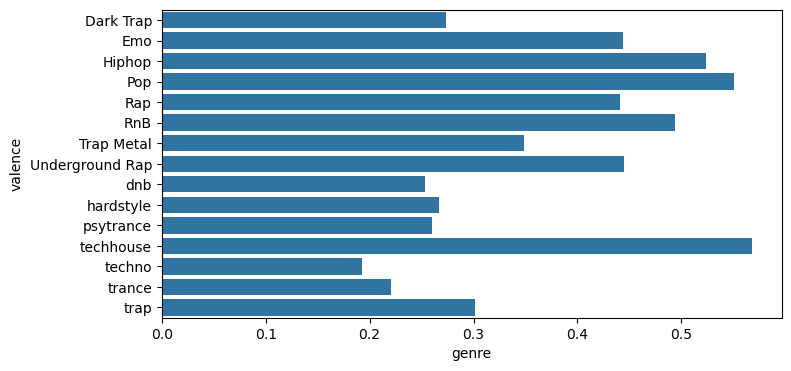

In [28]:
# group by genre and calculating the vaalence of it 
function = {"valence" : "mean"}
mood_dataset = df1.groupby("genre").agg(function).reset_index()
# going the make the bar graph for this mood dataset 
plt.figure(figsize = (8,4))
sns.barplot( x = mood_dataset['valence'],y = mood_dataset['genre'])
plt.xlabel("genre")
plt.ylabel("valence")
plt.show()

In [ ]:
# conclusion 
#  the happy feeling - > tech house , pop , hiphop
# the sad felling -> trance , techno 

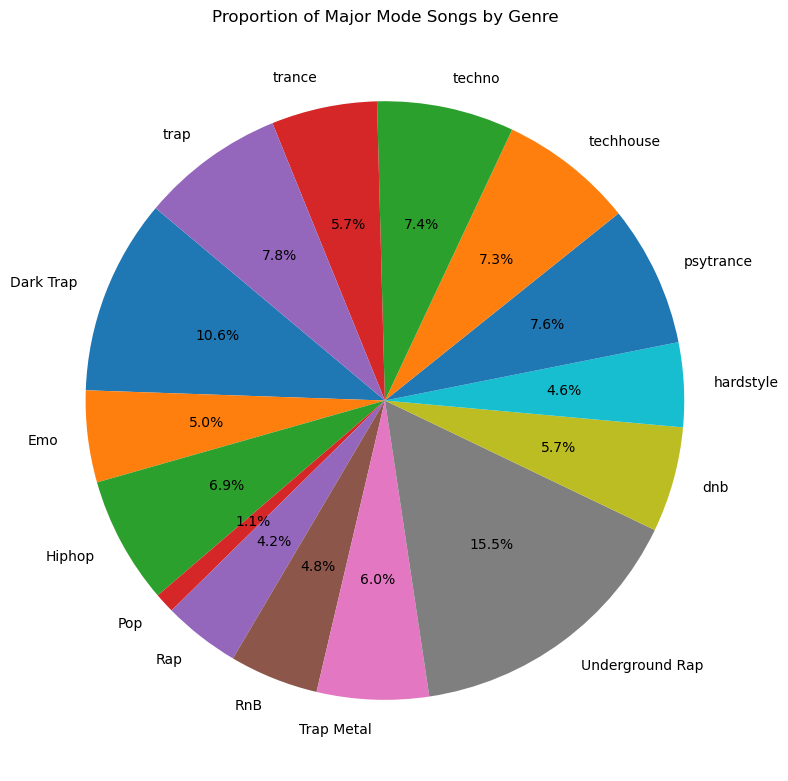

In [31]:
# the tone in which thet song is written 
function1 = {"mode": "sum"}
tone_dataset = df1.groupby("genre").agg(function1).reset_index()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(tone_dataset["mode"], labels=tone_dataset["genre"], autopct="%1.1f%%", startangle=140)
plt.title("Proportion of Major Mode Songs by Genre")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


conclusion 
maximum mode
underground rap -> the mode tone is happy here 
Dark Trap -> the mode tone is happy here 
mimimum mode 
Pop -> the mode tone is low 
Rap -> the mode tone is low

In [33]:
df1.rename(columns={"duration_ms": "duration_minute"},inplace = True)

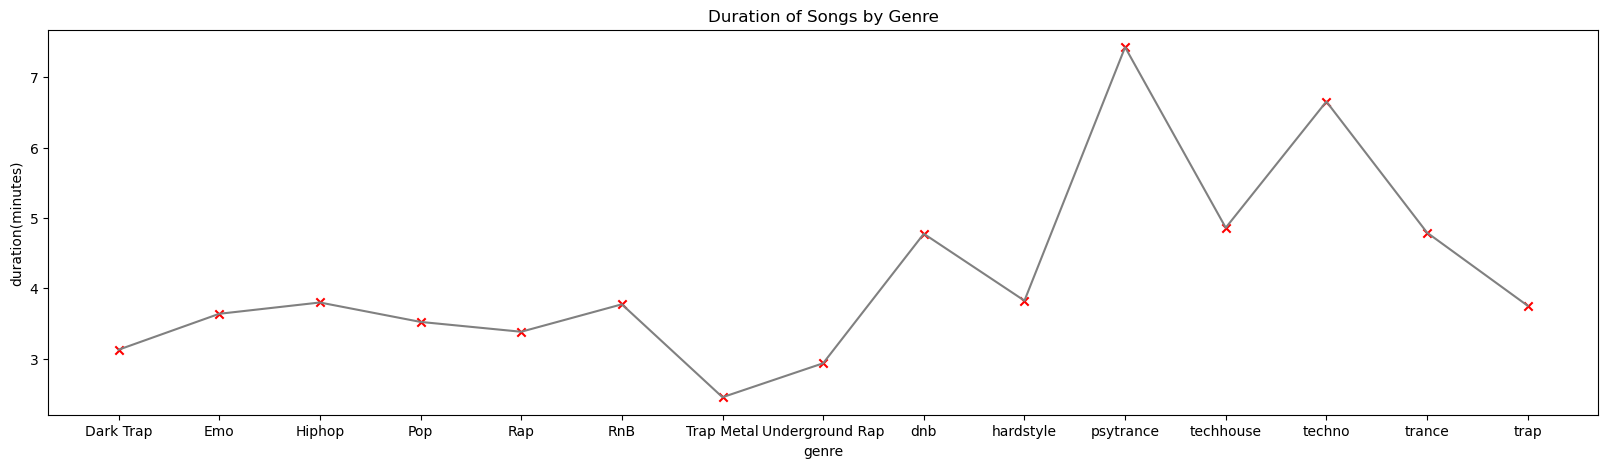

In [37]:
function2 = {"duration_minute":"mean"}
time_dataset = df1.groupby("genre").agg(function2).reset_index()
plt.figure(figsize=(20, 5))

# Line without marker
sns.lineplot(data=time_dataset, x="genre", y="duration_minute", color="gray", dashes = True)

# Markers only in red
plt.scatter(time_dataset["genre"], time_dataset["duration_minute"], color="red", marker='x')

plt.title("Duration of Songs by Genre")
plt.xlabel("genre")
plt.ylabel("duration(minutes)")
plt.show()


conclusion 
the techhouse has the highest duration 
trapmetal has the lowest time duration 

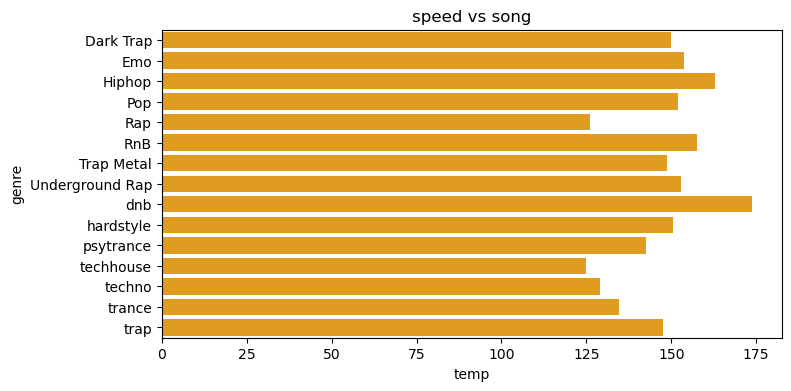

In [39]:
# doing tempo verses the genre 
# which song has the highest average speed with the genre 
function3 = {"tempo" : "mean"}
speed_song = df1.groupby("genre").agg(function3).reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x =speed_song["tempo"],y = speed_song["genre"],color = "orange")
plt.title("speed vs song")
plt.xlabel("temp")
plt.ylabel("genre")
plt.show()

conclusion 
dnb has the highest speed of all 
techhouse has the lowest speed among the others 

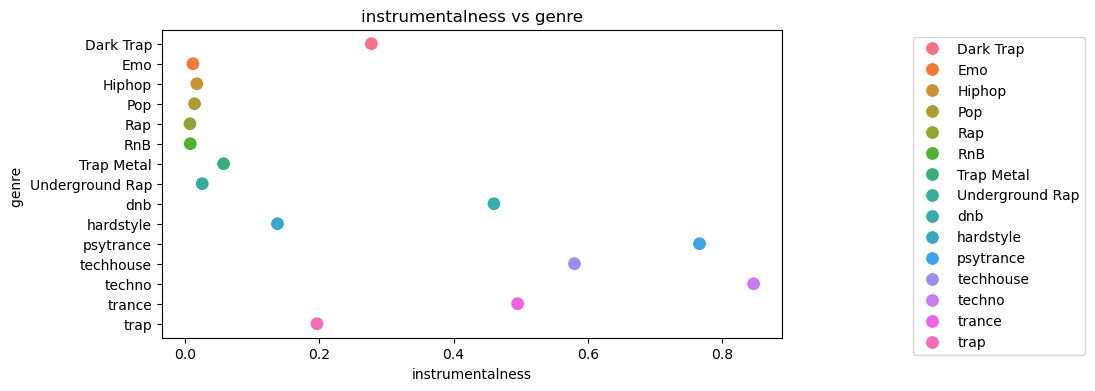

In [67]:
# instrumentalness with the genre 
function4 = {"instrumentalness":"mean"}
without_instrument = df1.groupby("genre").agg(function4).reset_index()
plt.figure(figsize=(8,4))
sns.scatterplot(x = without_instrument["instrumentalness"],y = without_instrument["genre"], hue = without_instrument["genre"], s = 100)
plt.title("instrumentalness vs genre")
plt.xlabel("instrumentalness")
plt.ylabel("genre ")
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()

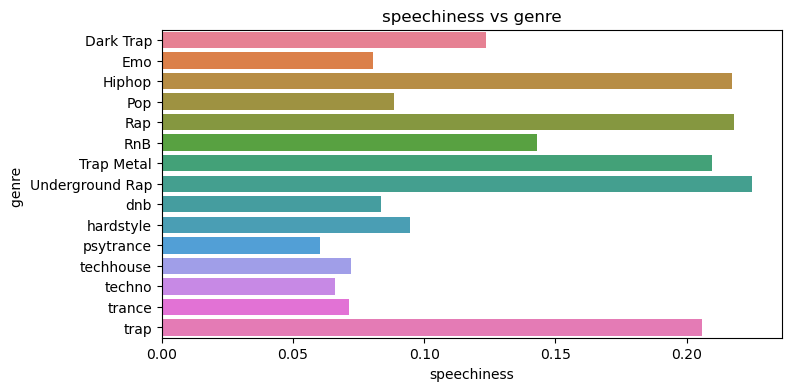

In [69]:
# speechiness vs genre 
function5 = {"speechiness":"mean"}
speechiness_dataset = df1.groupby("genre").agg(function5).reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x = speechiness_dataset["speechiness"],y = speechiness_dataset["genre"], hue = speechiness_dataset["genre"])
plt.title("speechiness vs genre")
plt.xlabel("speechiness")
plt.ylabel("genre ")
plt.show()

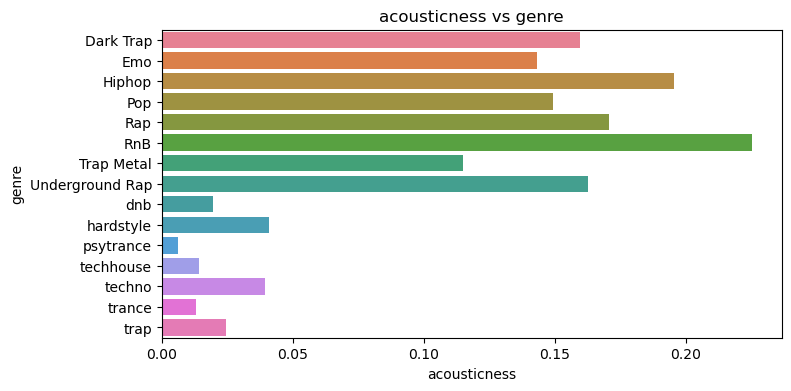

In [75]:
function6 = {"acousticness":"mean"}
natural_instrument = df1.groupby("genre").agg(function6).reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x = natural_instrument["acousticness"],y = natural_instrument["genre"],hue = speechiness_dataset["genre"])
plt.title("acousticness vs genre")
plt.xlabel("acousticness")
plt.ylabel("genre")
plt.show()

In [158]:
# Step 1: Identify weird songs
weird_danceable_sad = df[(df['danceability'] > 0.8) & (df['valence'] < 0.2)]
loud_sad_songs = df[(df['loudness'] > -3) & (df['valence'] < 0.2)]

# Step 2: Combine their indexes
outliers_index = weird_danceable_sad.index.union(loud_sad_songs.index)

# Step 3: Remove them from dataset
df_cleaned = df1.drop(outliers_index)



In [209]:
X = df_cleaned[['danceability', 'speechiness', 'acousticness', 'tempo', 'loudness','instrumentalness']]
y = df_cleaned['valence']



model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))



R2 Score: 0.5021351100218758


In [211]:
df_cleaned['y_pred'] = model.predict(X)

In [203]:
print(df_cleaned)

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
5             0.721   0.568    0   -11.295     1       0.4140      0.045200   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo

In [215]:

# New data for prediction (example values)
new_data = {
    'danceability': [0.75],
    'speechiness': [0.05],
    'acousticness': [0.2],
    'tempo': [190.0],
    'loudness': [0.443],
    'instrumentalness' : [0.342]
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Use the trained model to predict valence
valence_prediction = model.predict(new_df)

# Output the predicted valence
print("Predicted Valence:", valence_prediction[0])


Predicted Valence: 0.4723109999999998
